# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/21f_made/homeworks/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,667,110,53,104,223,66,10,211,32,24,164,223,659,210,67,5,16,190,203
1,765,84,43,70,123,54,8,151,45,19,146,173,332,176,81,1,12,181,184
2,792,100,51,104,163,52,10,206,32,23,164,217,631,193,69,5,21,188,196
3,522,89,36,69,162,63,6,140,48,18,131,164,291,126,66,1,38,193,204
4,714,94,44,70,186,72,8,153,42,19,144,171,361,178,67,7,2,199,206
5,665,90,47,85,161,64,10,163,42,20,160,177,389,185,73,9,0,185,195
6,58,107,53,103,221,66,11,209,32,24,163,222,653,212,66,0,1,191,201
7,486,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
8,312,82,41,70,155,64,7,148,45,19,138,172,328,152,72,5,17,187,195
9,836,87,45,66,139,58,8,140,47,18,148,168,294,175,73,3,12,188,196


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,423.018215,93.557377,44.759563,82.045537,168.657559,61.551913,8.417122,168.923497,40.943534,20.584699,147.734062,188.382514,440.581056,174.034608,72.333333,6.406193,12.591985,188.883424,195.533698
std,242.907569,8.375477,6.263709,15.699381,32.345749,6.440884,3.988002,33.476072,7.860003,2.617080,14.784780,31.336346,178.297584,32.905648,6.818556,4.905386,8.980576,6.130655,7.343827
min,4.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,218.000000,87.000000,39.000000,70.000000,142.000000,57.000000,6.000000,146.000000,33.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,420.000000,92.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,366.000000,172.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,630.000000,100.000000,49.000000,98.000000,197.000000,65.000000,10.000000,200.000000,46.000000,23.000000,160.000000,217.000000,598.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,844.000000,119.000000,58.000000,110.000000,250.000000,105.000000,55.000000,265.000000,61.000000,29.000000,182.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,39.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [6]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

enc = LabelEncoder()
enc.fit(y_train)
y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

Answer:
- Scaler is needed for better learning quality of some of the future models
- Although many models can work with target in any form, just in case it has been converted to numbers

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

f1_score =  0.7800743239620547
accuracy =  0.7845117845117845


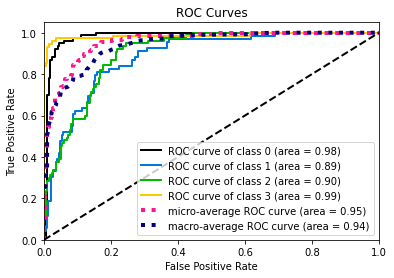

In [7]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
from scikitplot.metrics import plot_roc

params_for_logreg = {'multi_class': 'multinomial',
                     'solver': 'saga',
                     'tol': 1e-3,
                     'max_iter': 500,}

grid = {"C": np.logspace(-4,1,6)}
logreg = LogisticRegression(**params_for_logreg)
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train, y_train)
logreg = logreg_cv.best_estimator_

best_params_for_logreg = logreg.get_params()

print('f1_score = ', f1_score(y_test, logreg.predict(X_test), average='macro'))
print('accuracy = ', accuracy_score(y_test, logreg.predict(X_test)))

plot_roc(y_test, logreg.predict_proba(X_test))
plt.show()

In [8]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

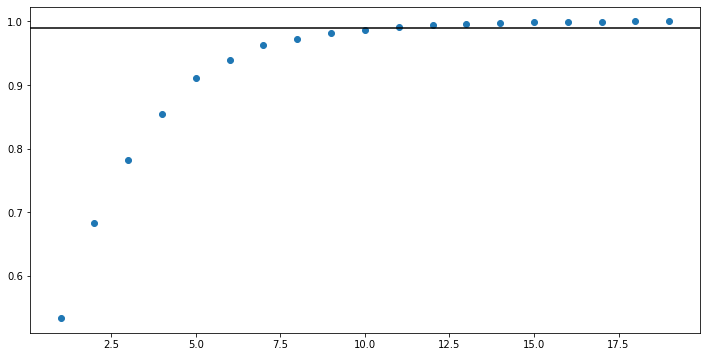

In [9]:
from sklearn.decomposition import PCA

pca = PCA()
pca_components = pca.fit_transform(X_train)

plt.figure(figsize = (12,6))
plt.axhline(y=0.99, color='k')
plt.scatter(np.arange(1, X_train.shape[1] + 1), np.cumsum(pca.explained_variance_ratio_))
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Answer:
- Data needs to be normalized, because then the PCA will take features in wider scales as the main components
- n_components = 11, because then explained variance is approximately 0.99

In [10]:
pca = PCA(n_components=11)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

f1_score =  0.7552262950624188
accuracy =  0.7609427609427609


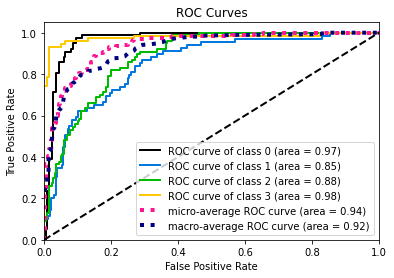

In [11]:
grid = {"C": np.logspace(-3,1,5)}
logreg = LogisticRegression(**params_for_logreg)
logreg_cv = GridSearchCV(logreg, grid, cv=10)
logreg_cv.fit(X_train_pca, y_train)
logreg = logreg_cv.best_estimator_

print('f1_score = ', f1_score(y_test, logreg.predict(X_test_pca), average='macro'))
print('accuracy = ', accuracy_score(y_test, logreg.predict(X_test_pca)))

plot_roc(y_test, logreg.predict_proba(X_test_pca))
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

f1_score =  0.6344200701578802
accuracy =  0.632996632996633
max_depth =  7


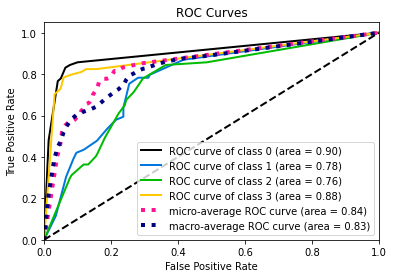

In [12]:
from sklearn.tree import DecisionTreeClassifier

grid = {"max_depth": np.arange(1,10)}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(tree, grid, cv=10)
tree_cv.fit(X_train_pca, y_train)
tree = tree_cv.best_estimator_

best_max_depth = tree.get_params()['max_depth']

print('f1_score = ', f1_score(y_test, tree.predict(X_test_pca), average='macro'))
print('accuracy = ', accuracy_score(y_test, tree.predict(X_test_pca)))
print('max_depth = ', best_max_depth)

best_params_for_tree = tree.get_params()

plot_roc(y_test, tree.predict_proba(X_test_pca))
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

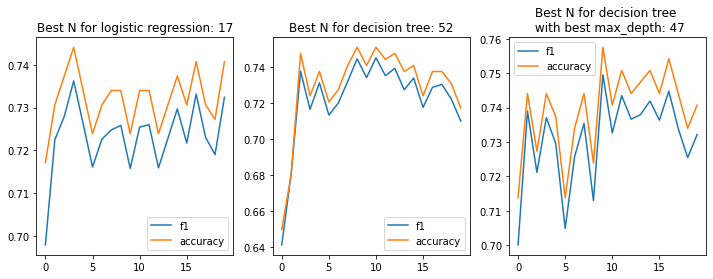

In [13]:
from sklearn.ensemble import BaggingClassifier

f1_logreg, f1_tree, f1_tree2 = [], [], []
acc_logreg, acc_tree, acc_tree2 = [], [], []

for n in range(2, 100, 5):
  # Bagging with logistic regression
  bagging_logreg = BaggingClassifier(
      base_estimator=LogisticRegression(**params_for_logreg),
      n_estimators=n,
  )
  bagging_logreg.fit(X_train, y_train)
  f1_logreg.append(f1_score(y_test, bagging_logreg.predict(X_test), average='macro'))
  acc_logreg.append(accuracy_score(y_test, bagging_logreg.predict(X_test)))
  # Bagging with decision tree
  bagging_tree = BaggingClassifier(
      base_estimator=DecisionTreeClassifier(),
      n_estimators=n,
  )
  bagging_tree.fit(X_train, y_train)
  f1_tree.append(f1_score(y_test, bagging_tree.predict(X_test), average='macro'))
  acc_tree.append(accuracy_score(y_test, bagging_tree.predict(X_test)))
  # Bagging with decision tree with best max_depth
  bagging_tree2 = BaggingClassifier(
      base_estimator=DecisionTreeClassifier(max_depth=best_max_depth),
      n_estimators=n,
  )
  bagging_tree2.fit(X_train, y_train)
  f1_tree2.append(f1_score(y_test, bagging_tree2.predict(X_test), average='macro'))
  acc_tree2.append(accuracy_score(y_test, bagging_tree2.predict(X_test)))

plt.figure(figsize = (12, 4))

plt.subplot(1, 3, 1)
plt.plot(f1_logreg, label='f1')
plt.plot(acc_logreg, label='accuracy')
plt.title(f'Best N for logistic regression: {2 + 5 * np.argmax(f1_logreg)}')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(f1_tree, label='f1')
plt.plot(acc_tree,label='accuracy')
plt.title(f'Best N for decision tree: {2 + 5 * np.argmax(f1_tree)}')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(f1_tree2, label='f1')
plt.plot(acc_tree2,label='accuracy')
plt.title(f'Best N for decision tree \n with best max_depth: {2 + 5 * np.argmax(f1_tree2)}')
plt.legend()

plt.show()

Answer:
- The quality of the models improves only in the first 2-3 iterations, after it wanders around the same value. This may be due to the fact that when bagging a small number of models are enough to improve the quality, the remaining models have practically no effect on the result
- Although in this case, the quality has also increased, with each iteration there is a large spread of metrics, so in this case, bagging should be done with caution

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

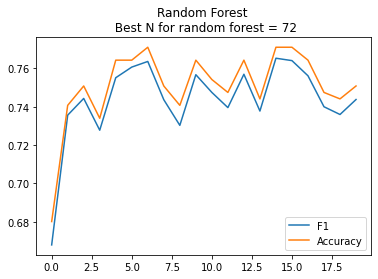

In [14]:
from sklearn.ensemble import RandomForestClassifier

f1_rf = []
acc_rf = []

for n in range(2, 100, 5):
  rf = RandomForestClassifier(n_estimators=n)
  rf.fit(X_train, y_train)
  f1_rf.append(f1_score(y_test, rf.predict(X_test), average='macro'))
  acc_rf.append(accuracy_score(y_test, rf.predict(X_test)))

best_n = 2 + 5 * np.argmax(f1_rf)
best_params_for_rf = {'n_estimators': best_n}

plt.plot(f1_rf, label='F1')
plt.plot(acc_rf, label='Accuracy')
plt.title(f'Random Forest \n Best N for random forest = {best_n}')
plt.legend()
plt.show()

Answer:
- The situation is similar to bagging on ordinary decision trees

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

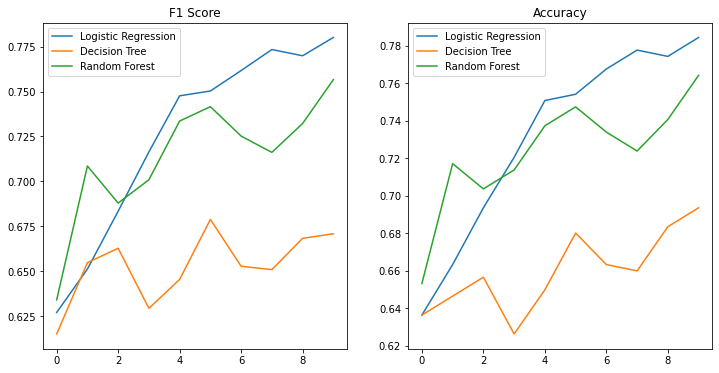

In [15]:
X_parts = np.array_split(X_train, 10)
y_parts = np.array_split(y_train, 10)

f1_logreg, f1_tree, f1_rf = [], [], []
acc_logreg, acc_tree, acc_rf = [], [], []

for i in range(10):
  if 0 == i:
    X_train_from_parts, y_train_from_parts = X_parts[0], y_parts[0]
  else:
    X_train_from_parts = np.concatenate((X_train_from_parts, X_parts[i]))
    y_train_from_parts = np.concatenate((y_train_from_parts, y_parts[i]))

  logreg = LogisticRegression(**best_params_for_logreg)
  tree = DecisionTreeClassifier(**best_params_for_tree)
  rf = RandomForestClassifier(**best_params_for_rf)
  
  logreg.fit(X_train_from_parts, y_train_from_parts)
  tree.fit(X_train_from_parts, y_train_from_parts)
  rf.fit(X_train_from_parts, y_train_from_parts)

  f1_logreg.append(f1_score(y_test, logreg.predict(X_test), average='macro'))
  f1_tree.append(f1_score(y_test, tree.predict(X_test), average='macro'))
  f1_rf.append(f1_score(y_test, rf.predict(X_test), average='macro'))

  acc_logreg.append(accuracy_score(y_test, logreg.predict(X_test)))
  acc_tree.append(accuracy_score(y_test, tree.predict(X_test)))
  acc_rf.append(accuracy_score(y_test, rf.predict(X_test)))

fig = plt.figure(figsize = (12, 6))
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)

ax_1.plot(f1_logreg, label='Logistic Regression')
ax_1.plot(f1_tree, label='Decision Tree')
ax_1.plot(f1_rf, label='Random Forest')
ax_1.set_title('F1 Score')
ax_1.legend()

ax_2.plot(acc_logreg, label='Logistic Regression')
ax_2.plot(acc_tree, label='Decision Tree')
ax_2.plot(acc_rf, label='Random Forest')
ax_2.set_title('Accuracy')
ax_2.legend()

plt.show()

Answer:
- The plot looks logical. The more data we use for training, the better the quality of the model